## LINEAR REGRESSION DANILO GIOVANNICO

In [1]:
#Pandas è una libreria software scritta per il linguaggio di programmazione Python per la manipolazione e l'analisi dei dati. In particolare, offre strutture dati e operazioni per manipolare tabelle numeriche e serie temporali.
import pandas as pd
#NumPy è una libreria open source per il linguaggio di programmazione Python, che aggiunge supporto a grandi matrici e array multidimensionali insieme a una vasta collezione di funzioni matematiche di alto livello per poter operare efficientemente su queste strutture dati.
import numpy as np
#Matplotlib è una libreria per la creazione di grafici per il linguaggio di programmazione Python e la libreria matematica NumPy. Fornisce API orientate agli oggetti che permettono di inserire grafici all'interno di applicativi usando toolkit GUI generici, come WxPython, Qt o GTK.
import matplotlib.pyplot as plt
#Importo il modello di regressione lineare
#Il nostro obiettivo è confrontare la funzione scritta da noi con una implementata da una libreria (sklearn). Quindi prima la implementiamo manualmente e poi la confrontiamo con quella di sklearn.
from sklearn.linear_model import LinearRegression
# Modulo contenente Axes3D, un oggetto che può tracciare oggetti 3D su una figura matplotlib 2D.
from mpl_toolkits.mplot3d import axes3d
import time as tm

#### Caricamento dataset

In [2]:
#Carico i dati contenuti nel file che saranno splittati dal delimitatore ,
#Il dataset contiene i dati della popolazione in migliaia ed il profitto
data = np.loadtxt('data/pop-profit.txt', delimiter=',')

#Stampo i primi 10 elementi e tutte le colonne
print(data[:5,:])

#Stampo lo shape dei dati, cioè le dimensioni della struttura dati
print(data.shape)

[[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]
(97, 2)


#### Supervised Learning
$$\large h_{\theta}{x} = \theta_{0} + \theta_{1}x $$

In [3]:
#Nel nostro caso adottiamo un modello lineare
#Unisco due colonne, la prima è la colonna di 1 (data.shape) e la seconda colonna corrisponde alla prima colonna del dataset. La colonna di 1 serve a pesare il parametro theta 0 da stimare insieme a theta1
#Devo definire i parametri theta0 e theta1 che meglio fittano il modello
X = np.c_[np.ones(data.shape[0]),data[:,0]]
#Prendo la seconda colonna dal dataset estratto dal txt
#y rappresenta il valore vero
y = np.c_[data[:,1]]

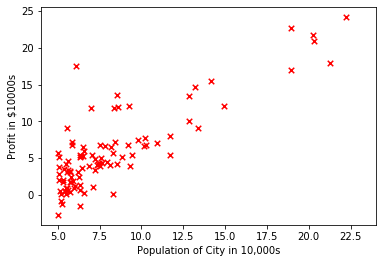

In [4]:
#Traccio un diagramma a dispersione (scatterplot), s rappresenta la scala, c il colore, marker il tipo di simbolo, spessore simboli
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10000s')
plt.show()


   #### Linear regression model
   $$\hat{y} = h_\theta{x} = x\theta_{1} + \theta_{0} = X\theta$$
   Questa equazione fornisce la stima della funzione. 
   X per Theta è la versione vettorizzata che è molto più semplice e serve a far risparmiare del tempo (evitiamo anche la trasposizione); 
   questa è del tutto equivalente ad avere Theta Trasposta per X.

#### Dimension Sanity Check
$$dim[x\theta_{1} + \theta_{0}] = m x n \cdot n x 1 + mx1$$
$$dim[X\theta] = m x n \cdot n x 1 = m x 1$$
Eseguo un check sulle dimensioni per sicurezza, nel nostro caso se avessimo X->(97,2) e Y->(97,1) avrei 2 x 1.
m = numero di righe o example (97).

#### Non-Vectorized Implementation
$$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{i})-y^{(i)})^{2}$$
Calcolo la funzione di costo come sommatoria eseguendo la differenza fra valore predetto e valore reale per tutte le righe del dataset.
Meno differenza ho più mi avvicino al fitting lineare.

#### Vectorized Implementation
$$J(\theta) = \frac{1}{2m}(X\theta - y)^{T}(X\theta - y)$$
Passiamo alla forma vettorizzata per velocizzare, ed eseguo i prodotti tutti insieme essendo matrici.
**N.B. Usiamo il 2 per facilitare la soluzione finale, quindi nella derivata (che faremo dopo) il 2 verrà diviso per il 2 dovuto alla derivazione. Eseguiamo uno scaling senza compromettere la derivata.**

In [5]:
#Creo la funzione di costo
#X input
#y = output
#Se non passo esplicitamente theta, theta è settata di default come un vettore nullo (di 0) di 2 righe ed una colonna
def computeCost(X, y, theta=np.zeros((2,1))):
    #Calcolo il numero di examples
    m = y.size
    #Setto una variabile per la funzione di costo
    J = 0
    
    #Ipotesi Lineare
    #Calcolo l'ipotesi che corrisponde al prodotto vettoriale X per Theta
    h = X.dot(theta)
    #Alternativa h = np.dot(X, theta)
    
    #Non-vectorized implementation
    #J = 1/(2*m)*np.sum(np.square(h-y))
    
    #vectorized implementation per trovare il costo
    J = 1/(2*m)*((h-y).T.dot(h-y))
    
    return(J)


### Linear Regression Cost Function with only theta1 parameter (bias) and Batch gradient descent

In [6]:
nsamples=50
#linspace: dati 2 estremi e il numero di campioni restituisce l'array
#Restituisce un numero di campioni distribuiti uniformemente, calcolati sull'intervallo [inizio, fine]
theta1=np.linspace(-10, 10, nsamples)
X_sample= X[:, 1]
hyp=[]
#Creao un array di zero
J=np.zeros((nsamples,1))
#per limitare le rette in un intervallo nel plot
#Restituisce valori equidistanti entro un determinato intervallo.
#I valori vengono generati all'interno dell'intervallo semi-aperto [start, stop) (in altre parole, l'intervallo compreso start ma escluso stop).
xx=np.arange(0,25)
#Ottengo il numero di righe
m=y.shape[0]
for i in range(nsamples):
    #Creo l'array con i theta
    Th=np.array(theta1[i])
    #Eseguo il prodotto vettoriale di X_sample con l'array di theta
    H = X_sample.dot(Th).reshape(-1,1) #numero di elementi sulla prima dim e mi devi dare una colonna
    #0+ perchè theta0 nell'hypotesis function è settato a 0 => intercetta pari a 0, 
    hyp.append(0+theta1[i]*xx)
    #Calcolo la funzione di costo e l'assegno alla posizione i-esima
    J[i]=((1/(2*m)*(H-y).T.dot(H-y)))

/Users/danilogiovannico/opt/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


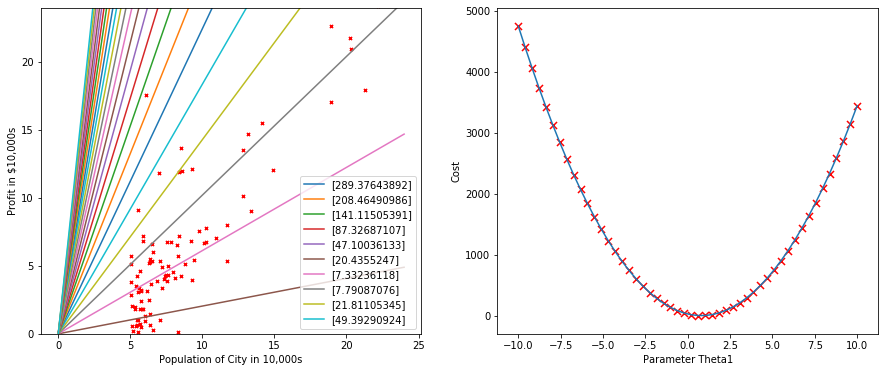

In [7]:
#subplot per avere i due scenari dell'hyp function e cost function
#si prepara l'ambiente per il plot specificandone la dimensione 
#nel primo subplot ho l'hyp function, nel secondo la cost function
fig=plt.figure(figsize=(15,6))
#si assegna ad ax1 l'oggetto subplot 1-> num righe , 2-> num colonne , 1-> prendo il primo grafico
ax1= fig.add_subplot(121)
#si assegna ad ax1 l'oggetto subplot 1-> num righe , 2-> num colonne , 2-> prendo il secondo grafico
ax2=fig.add_subplot(122)

ax1.set_xlabel('Population of City in 10,000s')
ax1.set_ylabel('Profit in $10,000s')

ax1.scatter(X[:,1], y, s=10, c='r', marker='x')
ax1.set_ylim(0,24)
for i in range(len(hyp)):
    ax1.plot(xx, hyp[i], label='theta1: '+ str(theta1[i]))
    
ax1.legend(J[20:30])
ax2.set_xlabel('Parameter Theta1')
ax2.set_ylabel('Cost')
ax2.plot(theta1, J)
ax2.scatter(theta1, J, s=50, c='r', marker='x' )


In [8]:
# Mi ritorna l'indice del valore minimo identificare il valore minimo
index=np.argmin(J)
# Ottengo il valore 
thetamin=theta1[index]
print(thetamin)
#il valore è sub-ottimo perchè non è considerato il theta0


0.612244897959183


#### Hypothesis function
$$\large h_{\theta}{x} = \theta_{0} + \theta_{1}x $$
#### Non-Vectorized Implementation
$$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{i})-y^{(i)})^{2}$$
#### Gradient of the cost function wrt the parameter theta j
$$\large \frac{\partial J(\theta)}{\partial \theta_{j}} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) x^{(i)}_{j} = \frac{1}{m} (X^T(X\theta - y)) \rightarrow \frac{1}{m} (X^T (X\theta - y)$$
#### Standard Implementation of Gradient Descent
$$\theta_{j} := \theta_{j} - \frac{\alpha}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) x^{(i)}_{j} ove j=0,1$$
#### Vectorized Implementation of Gradient Descent
$$\theta = \theta - \frac{\alpha}{m} ((X\theta -y)^T X)^T = \theta - \frac{\alpha}{m}(X^T (X\theta - y))$$

#### Hypothesis function a due parametri (theta0 diverso da 0) con Gradient Descent

In [9]:
#In questo caso stiamo valutando anche il peso relativo all'intercetta
nsamples=50
theta0=np.linspace(-80, 80, nsamples)
theta1=np.linspace(-10, 10, nsamples)

#crea una mappa di valore con indicizzazione cartesiana xy e ritorna due valori
xx, yy = np.meshgrid(theta0, theta1, indexing='xy')
Z=np.zeros((theta0.size, theta1.size))

#riempire Z, ndenumerate -> evita il doppio ciclo
#per ogni valore di Z abbiamo theta0 e theta1
for (i,j),k in np.ndenumerate(Z):
    Z[i,j]=computeCost(X,y, theta=[[xx[i,j]], [yy[i,j]]])
    
    

In [10]:
theta_history = list()

#Funzione per il calcolo del gradient descent
def gradientDescentVectorized(X, y, theta=np.zeros((2,1)), alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)

    start= tm.time()
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        
        #Aggiornamento simultaneo di tutti i parametri
        #Vectorized implementation
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, theta)
        #print("Cost: " +str(J_history[iter]))
        #print("Epocs " +str(iter)+ ": " +str(theta[0])+ ", " +str(theta[1])+ "\n")
        theta_history.append(theta)
        
    end = tm.time()
    return (theta.ravel(), J_history, end-start)

#theta = np.zeros((2,1))
theta_start = np.array([53, -5]).reshape(-1,1)
alpha=0.01
num_iters=5000

theta, Cost_J, time_gdv = gradientDescentVectorized(X, y, theta_start, alpha, num_iters)
print('time_gdv: ',  round(time_gdv*1000,2), '[ms]')


time_gdv:  38.84 [ms]


[298.90493326 297.56180842 296.49720327 ...   4.47697572   4.4769757
   4.47697569]


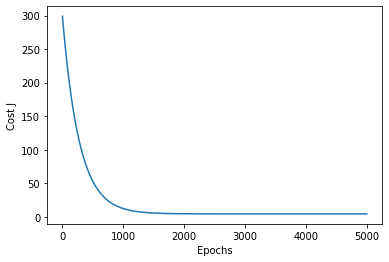

4.476975685956007


In [11]:
#Plottiamo il costo
#Se il costo decresce raggiungendo una regione flat vuol dire che sto addestrando bene sul training set
print(Cost_J)
plt.figure()
plt.plot(Cost_J)
plt.xlabel('Epochs')
plt.ylabel('Cost J')
plt.show()
print(Cost_J.min())


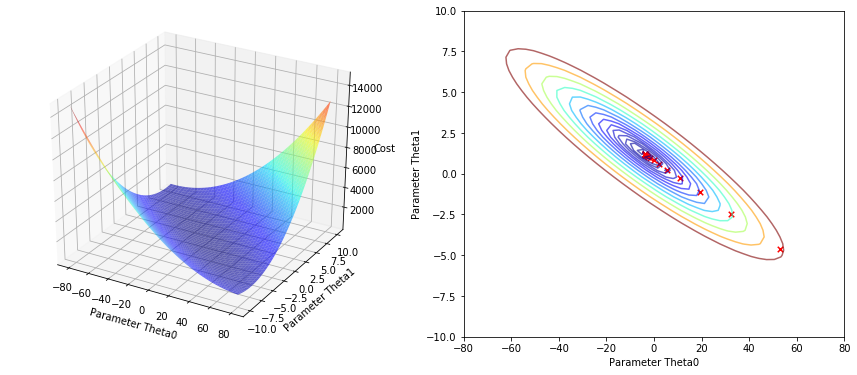

In [12]:
fig=plt.figure(figsize=(15,6))
#si assegna ad ax1 l'oggetto subplot 1-> num righe , 2-> num colonne , 1-> prendo il primo grafico
ax1= fig.add_subplot(121, projection='3d')
ax1.set_xlabel('Parameter Theta0')
ax1.set_ylabel('Parameter Theta1')
ax1.set_zlabel('Cost')
#rstride e cstride definiscono la step size dell'array, alpha è la trasparenza, cmap definisce la scala di colori
ax1.plot_surface(xx, yy, Z, cmap=plt.cm.jet, alpha=0.6, rstride=1, cstride=1)
ax1.set_zlim(Z.min(), Z.max())

#si assegna ad ax1 l'oggetto subplot 1-> num righe , 2-> num colonne , 2-> prendo il secondo grafico
ax2=fig.add_subplot(122)
ax2.set_xlabel('Parameter Theta0')
ax2.set_ylabel('Parameter Theta1')
ax2.contour(xx, yy, Z, np.logspace(-2.5,2.5,40), cmap=plt.cm.jet, alpha=0.6)
ax2.set_xlim(-80,80)
for index, point in enumerate(theta_history, start=0):
    if index % 250 == 0 or index == (len(theta_history) - 1):
        ax2.scatter(point[0], point[1], c='r', marker='x', s=30)
        

#### Linear Regression con Sklearn

In [13]:
#linear regression with scikit-learn
regr = LinearRegression()

startSk_L = tm.time()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
endSk_L = tm.time()

timeSk_L = endSk_L-startSk_L
print('timeSk_L : ', round(timeSk_L*1000, 2), '[ms]')

#print(regr.coef_)
#print(regr.intercept_)


timeSk_L :  4.19 [ms]


#### Linear Regression scikit-learn VS Linear Regression Gradient Descent

In [14]:
#Funzione per il plot del modello sul grafico, la quale dato un insieme di punti e bias ed intercetta ritorna l'output
def computeYModel(i, bias, intercept):
    return i*bias + intercept

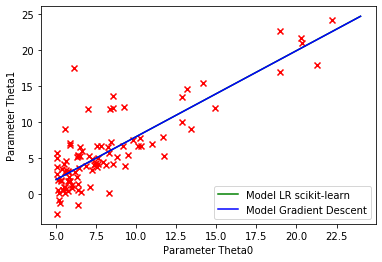

In [15]:
xll = []
yll = []
point[0], point[1]
xgd = []
ygd = []
for i in range(5,25):
    xll.append(i)
    yll.append(computeYModel(i, regr.coef_[0], regr.intercept_))
    
    xgd.append(i)
    ygd.append(computeYModel(i, theta_history[-1][1], theta_history[-1][0]))


plt.scatter(X[:,1].reshape(-1,1), y.ravel(),  color='r', marker='x', linewidths=1)

#Plotto modello modello scikit-learn
plt.xlabel('Parameter Theta0')
plt.ylabel('Parameter Theta1')
plt.plot(xll, yll, c='g', label='Model LR scikit-learn')

#Plotto modello creato da noi
plt.xlabel('Parameter Theta0')
plt.ylabel('Parameter Theta1')
plt.plot(xgd, ygd, c='blue', label='Model Gradient Descent')

plt.legend(loc=4)
plt.show()

Text(0, 0.5, 'Profit in $10,000s')

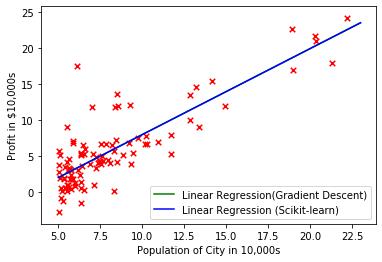

In [16]:
#Funzioni usate in classe dal professore
xxx=np.arange(5,24)
regr=LinearRegression()
#si può calcolare theta0 o no -> intercept true o false
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xxx, regr.intercept_ + regr.coef_ * xxx, label='Linear Regression(Gradient Descent)', c='g')

plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xxx, theta[0] + theta[1]*xxx, label="Linear Regression (Scikit-learn)", c='b')
plt.legend(loc=4)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

Aumentando il numero di iterazioni le rette combaciano, questo significa che entrambe hanno raggiunto il minimo e quindi gli stessi parametri.

## Make Prediction

In [17]:
x = np.array([1, 5.5]).reshape(1,-1)
y_out = np.dot(x, theta) 
print('Predicted price of profit (using gradient descent): {}'.format(y_out))

Predicted price of profit (using gradient descent): [2.66898297]


#### Live Gradient Descent

In [18]:
def gradientDescent(X, y, theta=np.zeros((2,1)), alpha=0.01, num_iters=1500):
    m=y.size
    J_history = np.zeros(num_iters)
    thetas=[]
    sample_theta=200
    
    for iter in np.arange(num_iters):
        h= X.dot(theta)
        
        if(iter % sample_theta ==0):
            thetas.append(theta.ravel())
            
        theta = theta -alpha*(1/m)*(X.T.dot(h-y))
        J_history[iter]=computeCost(X,y,theta)
    
    return(theta.ravel(), J_history, thetas)

Theta:  [-3.88890033  1.19234242]


Text(0.5, 0, 'Iterations')

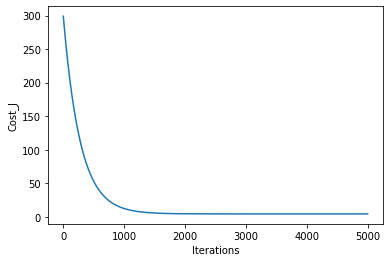

In [19]:
#theta = np.zeros((2,1))
theta_start = np.array([53, -5]).reshape(-1,1)
theta[0] = 53
theta[1] = -5

alpha=0.01
num_iters=5000

theta, Cost_J, thetas = gradientDescent(X, y, theta_start, alpha, num_iters)
print("Theta: " ,theta)

T0 = [i[0] for i in thetas]
T1 = [i[1] for i in thetas]

plt.plot(Cost_J)
plt.ylabel("Cost_J")
plt.xlabel("Iterations")

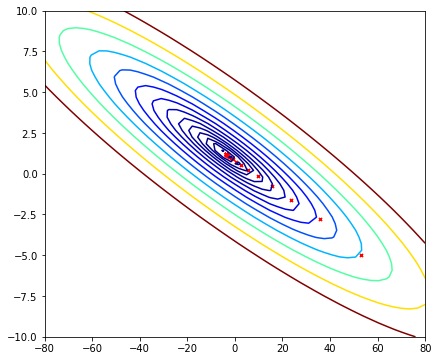

(-5.5, 10.0)

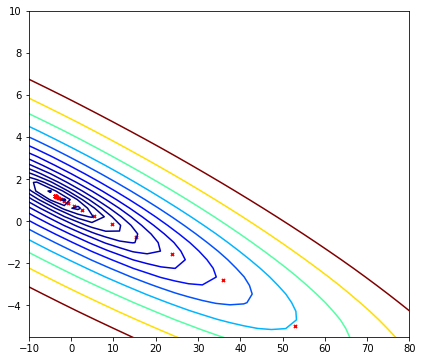

In [20]:
import pylab as pl
from IPython import display

fig = plt.figure(figsize=(15,6))
ax3 = fig.add_subplot(121)

ax3.contour(xx, yy, Z, np.logspace(-2,3,30), cmap=plt.cm.jet)
for i in range(len(T0)):
    pl.scatter(T0[i], T1[i], c='r', s=10, marker='x')
    display.clear_output(wait=True)
    display.display(pl.gcf())
    tm.sleep(1.5)
    
ax3.set_xlim(-10,80)
ax3.set_ylim(-5.5)